In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
db_info = "data/dbinfo.db"
conn = sqlite3.connect(db_info)

In [9]:
query = "select * from 'log'  where timestamp >= '2018-06-11' and timestamp < '2018-06-12'"
log = pd.read_sql(query,conn)
print(log.shape)
log.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [10]:
log["timestamp"] = pd.to_datetime(log["timestamp"])
print(log.shape)

(105815, 6)


    - 컬럼 별 명세
        1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
        2. user_id : 이용자 고유 식별자
        3. event_origin : 이벤트가 발생한 앱 위치
            - event_origin 값 별 의미
                a. goods_search_result : 특정 검색어의 상품 검색 결과
                    (Ex: goods_search_result/반팔티)
                b. shops_ranking : '쇼핑몰 랭킹' 영역
                c. shops_bookmark : '즐겨찾기' 영역
                d. category_search_result : 카테고리 검색 결과 
                    (Ex:category_search_result/상의)
                e. my_goods : '내 상품' 영역
                
        4. event_name : 발생한 이벤트 명
            - event_name 값 별 의미
                a. app_page_view : 앱 내 화면 이동
                b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
                c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
                d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
                e. add_my_goods : 특정 상품을 내 상품 추가
                f. remove_my_goods : 특정 상품을 내 상품 제거
                
        5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
             - 상품 관련 이벤트가 아닌 경우, 공백
             
        6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
             - 쇼핑몰 관련 이벤트가 아닌 경우, 공백

#### user_id 임의 숫자로 단순화

In [11]:
user_id = log["user_id"].unique()
print(len(user_id))

user_id=np.sort(user_id)

9909


In [13]:
n_user_id = [i for i in range(len(user_id))]
id_zip = zip(user_id, n_user_id)
list(zip(user_id, n_user_id))[:5]

[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [14]:
id_dict = dict(id_zip)
log["n_user_id"] = log["user_id"].map(id_dict)
log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3287
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7775
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7851
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3287
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5558


In [17]:
log.loc[log['n_user_id'] == 7775].head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7775
32286,2018-06-11 11:10:20.255,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_ranking,app_page_view,NaN,NaN,7775
32287,2018-06-11 11:10:21.055,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7775
32315,2018-06-11 11:10:52.136,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7775
32317,2018-06-11 11:10:54.376,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7775


로그데이터만으로 구매여부 확인이 안되기 때문에 주문 테이블 데이터 확인

In [18]:
query = "select * from 'order' where timestamp >= '2018-06-11' and timestamp < '2018-06-12'"
order = pd.read_sql(query, conn)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [19]:
order.iloc[0]

timestamp             2018-06-11 00:00:43.032
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
Name: 0, dtype: object

In [20]:
log[log["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6185
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6185
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6185
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6185
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6185
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6185


위 고객은 린넨&린넨바지로 검색 후 북마크해둔 샵에서 구매로 유추 가능.

로그테이블과 구매테이블 이력을 기준으로 구매 이벤트를 추가. 

(하루치의 데이터이기 때문에 전날/다음날 걸쳐있는 사용자는 오류 유발 가능성이 있기 때문에 제외)

In [22]:
user_number_order = len(set(order["user_id"]))
user_number_log = len(set(log["user_id"]))
user_duplicated = set(order["user_id"]) & set(log["user_id"])

print('2018-06-11 구매한 총 고객수 :',user_number_order, end ='명\n')
print('2018-06-11 log데이터에 기록된 총 고객수 :',user_number_log,  end ='명\n')
print('중복고객수 :', len(user_duplicated) , end ='명\n')

2018-06-11 구매한 총 고객수 : 832명
2018-06-11 log데이터에 기록된 총 고객수 : 9909명
중복고객수 : 742명


In [23]:
order_copy = order.copy()
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin = shop_id 
order_copy['event_origin'] = order_copy['shop_id']

#  event_name = 'purchase'
order_copy['event_name'] = 'purchase'

# event_goods_id = good_id
order_copy['event_goods_id'] = order_copy['goods_id']

#n_user_id
order_copy['n_user_id'] = order_copy["user_id"].map(id_dict)

order_copy = order_copy[['timestamp', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price', 'n_user_id']]
order_copy.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,price,n_user_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000,6185
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500,8818
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000,7763
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200,2721
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800,7731


In [24]:
order_copy.shape

(772, 7)

작업 후 고객수 = 중복 고객수 확인 완료.

#### 구매기록과 로그데이터 병합

In [25]:
log_order = pd.concat([log, order_copy])
print(log_order.shape)
log_order.head()

(106587, 8)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price
0,2018-06-11 00:00:00.213000,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,3287,NaN
1,2018-06-11 00:00:00.810000,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,7775,NaN
2,2018-06-11 00:00:00.956000,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,7851,NaN
3,2018-06-11 00:00:01.084000,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,3287,NaN
4,2018-06-11 00:00:01.561000,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,5558,NaN


In [26]:
# ourchase 컬럼을 생성해서 구매 금액 입력
log_order["purchase"] = log_order["price"].notnull()
log_order[["event_goods_id","event_name","event_origin","event_shop_id","n_user_id","price","timestamp","user_id","purchase"]].head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_ranking,NaN,3287,NaN,2018-06-11 00:00:00.213000,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,NaN,app_page_view,shops_bookmark,NaN,7775,NaN,2018-06-11 00:00:00.810000,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,7851,NaN,2018-06-11 00:00:00.956000,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,3287,NaN,2018-06-11 00:00:01.084000,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,NaN,app_page_view,shops_bookmark,NaN,5558,NaN,2018-06-11 00:00:01.561000,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False


In [27]:
log_order = log_order.sort_values(["user_id", "timestamp"])
log_order.reset_index(inplace=True)
print(log_order.shape)
log_order[["event_goods_id","event_name","event_origin","event_shop_id","n_user_id","price","timestamp","user_id","purchase"]].head()

(106587, 10)


,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615000,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505000,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309000,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430000,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295000,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


### 고객 잔존 시간 분석

In [28]:
log_order["timestamp"] = pd.to_datetime(log_order["timestamp"])
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

,index,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id,price,purchase,timestamp_after
0,52042,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,2018-06-11 15:59:05.505
1,52185,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,0,NaN,False,NaT
2,7571,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 00:55:44.430
3,7589,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1,NaN,False,2018-06-11 01:00:33.295
4,8150,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1,NaN,False,2018-06-11 01:11:03.608


In [29]:
# 시간 기준 이전 로그와의 시간 계산. 마지막 로그일 경우 0
log_order["log_duration"] = log_order["timestamp_after"] - log_order["timestamp"]
log_order["log_duration"] = log_order["log_duration"].fillna(pd.Timedelta(seconds=0))
log_order[['timestamp','timestamp_after','log_duration']].head()

,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


In [30]:
log_order["log_duration"] = log_order["log_duration"].dt.total_seconds()
log_order["log_duration"] = log_order["log_duration"].astype(float)
log_order[["n_user_id", "timestamp", "timestamp_after", "log_duration"]].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


#### 앱에 들어와 활동한 시간 계산 (1사이클)
- log_duration == 0 : 당일 마지막 로그
- log_duration이 40분이 넘을 경우 한 사이클 종료 후 재접속으로 판단.

In [32]:
log_order.loc[log_order["log_duration"] == 0, "is_out"] = True
log_order.loc[log_order["log_duration"] > (40*60), "is_out"] = True
log_order["is_out"] = log_order["is_out"].fillna(False)
log_order.loc[log_order["is_out"], "log_duration"] = 0
log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False


In [33]:
log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(5)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1


In [35]:
log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# 첫 사이클 = 0
head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_unique','cycle_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,1,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,1,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,1,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1,0
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,2,0


#### 한 사이클당 활동 수 
한 사이클당 기록된 로그수로 평균 액션수를 분석

In [38]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size() 
                 .reset_index()  
                 .rename(columns = { 0 : "log_count"} ) 
                )

cycle_log_count.head(5)

,n_user_id,cycle_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,13
3,2,1,4
4,2,2,31


#### user별 활동수 높은 상위 5명 추출

In [40]:
cycle_user_log_count = (cycle_log_count.groupby("n_user_id")["log_count"].mean()
                        .reset_index().rename(columns={"log_count":"log_count_mean"}) )
        
log_order.groupby("n_user_id")["cycle_idx_daily"].nunique().sort_values(ascending=False).head()

n_user_id
5796    11
5956    10
2230    10
2404     9
6178     9
Name: cycle_idx_daily, dtype: int64

### 잔존시간 분석

In [42]:
remaining_time_cycle = (log_order.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

remaining_time_cycle.head(5)

,n_user_id,cycle_idx_daily,remaining_time
0,0,0,114.890
1,1,0,1011.541
2,2,0,893.742
3,2,1,69.618
4,2,2,3075.422


In [43]:
remaining_time_cycle.groupby("n_user_id")["remaining_time"].mean().reset_index().rename(columns={"remaining_time" : "duration"}).head()

,n_user_id,duration
0,0,114.890000
1,1,1011.541000
2,2,1346.260667
3,3,460.531250
4,4,49.130000


### 구매/비구매 고객별 잔존시간 비교

In [44]:
# 구매 고객수
cycle_purchase = log_order.loc[log_order["purchase"], "cycle_idx_unique"].unique()
len(cycle_purchase)

750

In [45]:
data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]

In [47]:
# 구매잔존
purchase = (data_purchase.groupby(["n_user_id","cycle_idx_unique"])["log_duration"].sum().reset_index()
            .rename(columns={"log_duration":"duration"}))
purchase.sort_values("cycle_idx_unique").head(10)

,n_user_id,cycle_idx_unique,duration
0,2,4,3075.422
1,8,15,412.025
2,8,16,1791.231
3,9,19,1657.393
4,46,88,3116.367
5,48,92,2615.611
6,64,123,3093.858
7,85,168,1906.721
8,96,192,3031.770
9,116,232,1191.110


In [48]:
# 비구매잔존
npurchase = (data_npurchase.groupby(["n_user_id","cycle_idx_unique"])["log_duration"].sum().reset_index()
             .rename(columns={"log_duration":"duration"}))
npurchase.sort_values("cycle_idx_unique").head(10)

,n_user_id,cycle_idx_unique,duration
0,0,0,114.890
1,1,1,1011.541
2,2,2,893.742
3,2,3,69.618
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


구매 cycle 잔존 시간 평균: 2280.0800799999997
비구매 cycle 잔존 시간 평균: 611.9902027010454


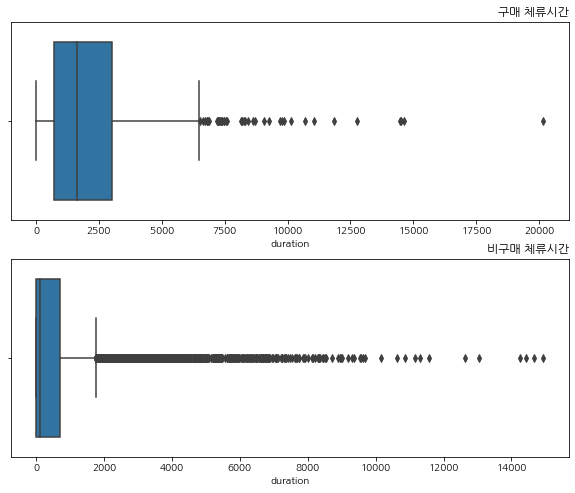

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='NanumGothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10,8)
sns.boxplot(data=purchase, x="duration", ax=ax1).set_title("구매 체류시간",loc='right')
sns.boxplot(data=npurchase, x="duration", ax=ax2).set_title("비구매 체류시간",loc='right')

print(f"구매 cycle 잔존 시간 평균: {purchase['duration'].mean()}")
print(f"비구매 cycle 잔존 시간 평균: {npurchase['duration'].mean()}")